# Data dependence on g, spectral amplitude (flux) varied

In [1]:
import numpy as np
import random
import time

In [2]:
import sys
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
plt.rc('ytick', labelsize=5)

In [4]:
import IPython

In [5]:
import pickle

In [6]:
import swyft

In [7]:
%matplotlib inline

In [8]:
files_name = "simulate_g_values" + "_files"
parent_dir = (os.getcwd()+"/").split('/notebooks/', 1)[0]
start_dir = os.getcwd()
files_dir = os.getcwd() + "/" + files_name 
store_name = files_name.split("_files")[0] + "_store"
store_dir = os.getcwd() + "/" + files_name + "/" + store_name
sys.path.append(files_dir)

In [9]:
from ALP_quick_sim import ALP_sim

In [10]:
with open(files_dir+"/"+'config_objects.pickle', 'rb') as file:
    config_objects = pickle.load(file)
for key in config_objects.keys():
    locals()[key] = config_objects[key]

with open(files_dir+"/"+'sim_objects.pickle', 'rb') as file:
    sim_objects = pickle.load(file)
for key in sim_objects.keys():
    locals()[key] = sim_objects[key]

with open(files_dir+"/"+'obs_objects.pickle', 'rb') as file:
    obs_objects = pickle.load(file) 
for key in obs_objects.keys():
    locals()[key] = obs_objects[key]

In [11]:
stores={}
samples={}
for g in g_values:    
    store = swyft.ZarrStore(store_dir + "/" + store_name + "_" + str(g).replace('.','-'))
    stores[str(g).replace('.','-')] = store
    samples[g] = store
    print('#samples for g='+str(g)+": " + str(len(samples[g])))

#samples for g=-10000000000: 10
#samples for g=-1.9: 10
#samples for g=-1.4: 10
#samples for g=-1.3: 10
#samples for g=-1.1: 10
#samples for g=-1: 10
#samples for g=-0.9: 10
#samples for g=-0.8: 10
#samples for g=-0.7: 10
#samples for g=-0.4: 10
#samples for g=-0.3: 10
#samples for g=-0.2: 10
#samples for g=0: 10
#samples for g=0.1: 10
#samples for g=0.2: 10
#samples for g=0.3: 10
#samples for g=0.4: 10
#samples for g=0.5: 10
#samples for g=0.7: 10
#samples for g=0.477: 10
#samples for g=0.778: 10
#samples for g=0.8: 10
#samples for g=1: 10
#samples for g=1.2: 10
#samples for g=1.4: 10
#samples for g=1.8: 10
#samples for g=2: 10


# Compare signals to posterior width

In [12]:
widths =[
    [0.1,0.7,2,1.4],
    [-0.9,-0.4,0.3,0.8,1.2,1.8],              #3sig,2sig,peak,truth,2sig,3sig
    [-1.3,-1,-0.2,0.4,0.5,1.2],
    [-1.1,-0.8,0.2,0.,1.,1.4],
    [g_values[0],g_values[0],-1.4, -0.7,-0.7,-0.3],
    [g_values[0],g_values[0],-1.9,-1.4,-0.8,-0.4],
]

colors_widths = [
    (.6,0,0),
    (.6,.2,0),
    (0,.5,.0),
    (0,0,0),
    (0,.4,.6),
    (0,0,.6),
]

transparency = 0.5


len_fft = 2**18
b = 3
logx = 0
logy = 1

# xft = np.linspace(0,bt,int(bt*((max(xs)-min(xs))/len(xs))*len_ft))

lenx = int(b*((np.log10(A.emax)-np.log10(A.emin))/A.nbins)*len_fft)
xax_ft = np.linspace(0,b,lenx)

def corrfunction(counts):
    return (1/abs(np.trapz(counts)))*abs(np.fft.fft(counts,n=len_fft))


In [13]:
def comparisons(which_truth,n=np.arange(0,8,1),n_truth=np.arange(0,8,1)):
    figs ={}
    A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, logy=0) 
    for j,width in enumerate(widths[which_truth:which_truth+1]):
        for i, g in enumerate(width):
            figs[i], _ = plt.subplots(1,2, figsize = (12*0.9,3))
            A.configure_plot(legend=0)
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0, axes=figs[i].axes[0])
            A.configure_plot(legend=1)
            
            #Off-truth
            for k in n:
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), label_obs=int(not k), errorbands=False,errors=0,
                               transparency = transparency, axes=figs[i].axes[0])
                figs[i].axes[1].plot(xax_ft,corrfunction(A.counts_obs['y'])[:lenx],color=colors_widths[i], alpha=0.5)

            #Truth
            obs = observations[which_truth]
            A.import_counts(obs=obs['data'],exp=obs['exp'])
            A.configure_model(params=obs['params'])
            A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,label_obs=1,
                           errorbands=0, errors=0, plot_obs=0, axes=figs[i].axes[0])
            for l in n_truth:
                A.configure_model(params=samples[obs['params'][0]]['params'][l])
                A.import_counts(obs=samples[obs['params'][0]]['data'][l],exp=samples[obs['params'][0]]['exp'][l])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors[which_truth],linestyle=':',
                               label_exp=int(not l), label_obs=0, errorbands=False,errors=0,
                               transparency = 0, axes=figs[i].axes[0])
                figs[i].axes[1].plot(xax_ft,corrfunction(A.counts_obs['y'])[:lenx],color=colors[which_truth],linestyle=':')
        
            figs[i].axes[1].plot(xax_ft,corrfunction(A.counts_obs['y'])[:lenx],color=colors[which_truth])
            if logx: figs[i].axes[1].set_xscale("log")
            if logy: figs[i].axes[1].set_yscale("log")
            figs[i].axes[1].set_ylabel('$|F_k|^2$',size=A.fontsize)
            figs[i].axes[1].set_xlabel('Frequency [$\log(E/\mathrm{GeV})^{-1}$]',size=A.fontsize)
            figs[i].axes[1].tick_params(axis='both', which='minor', labelsize=20)


Generating new null-hypothesis... done.


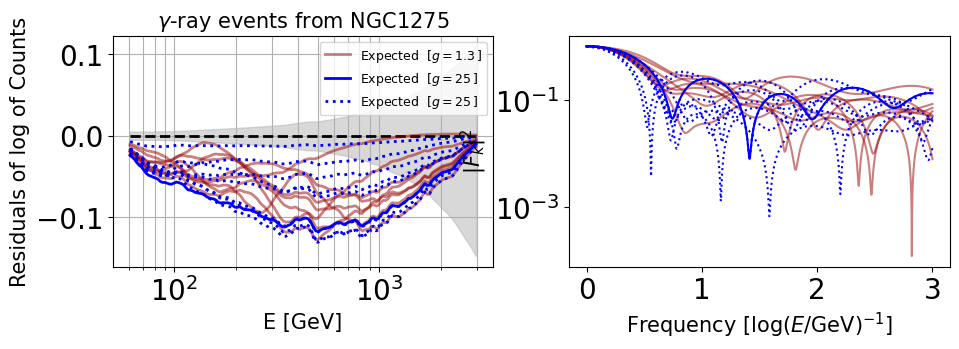

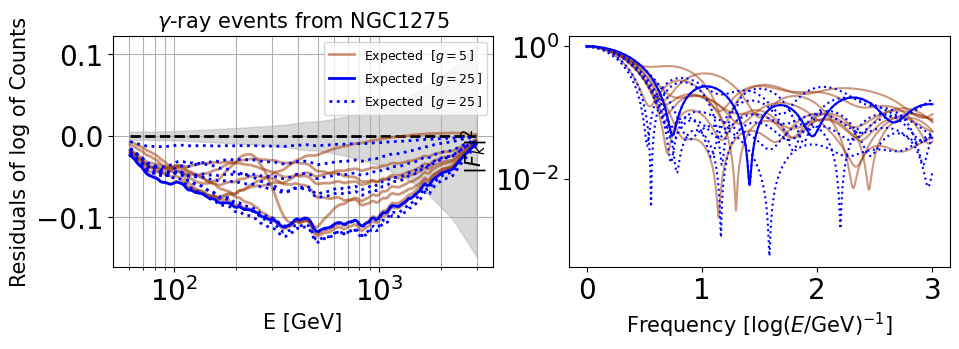

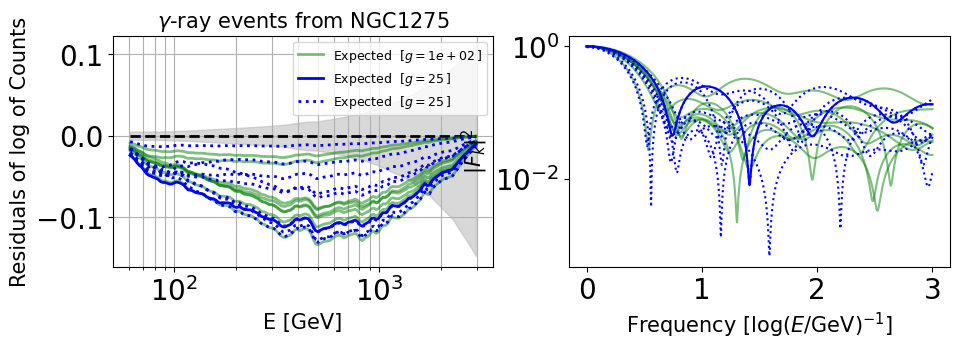

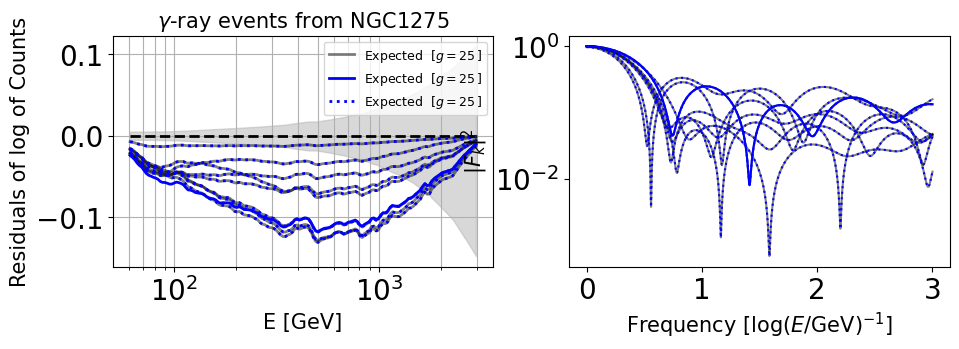

In [14]:
comparisons(0)

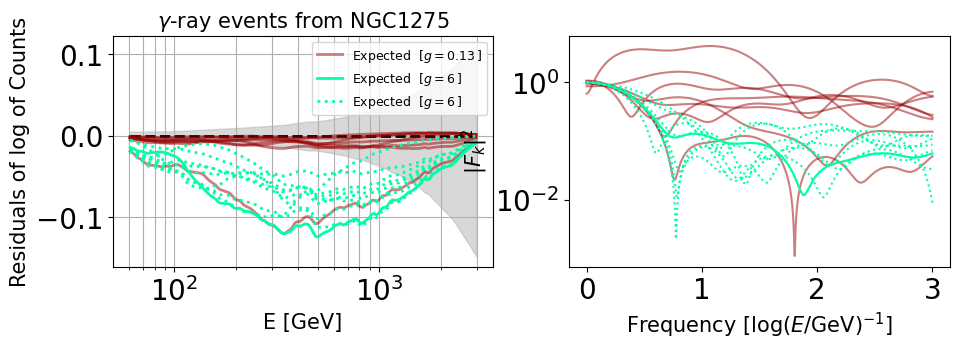

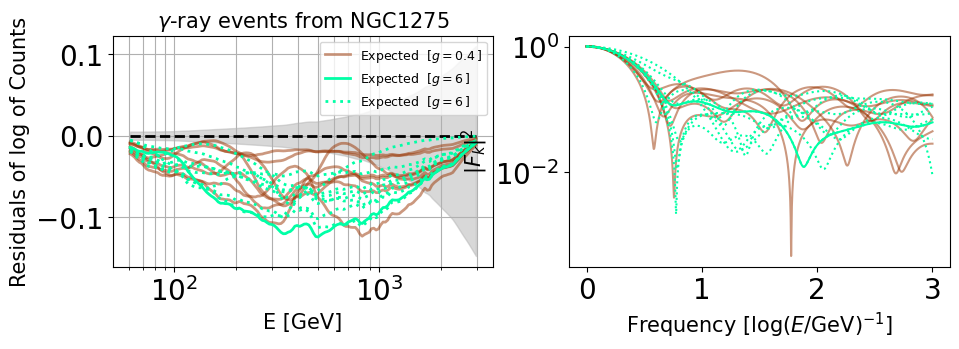

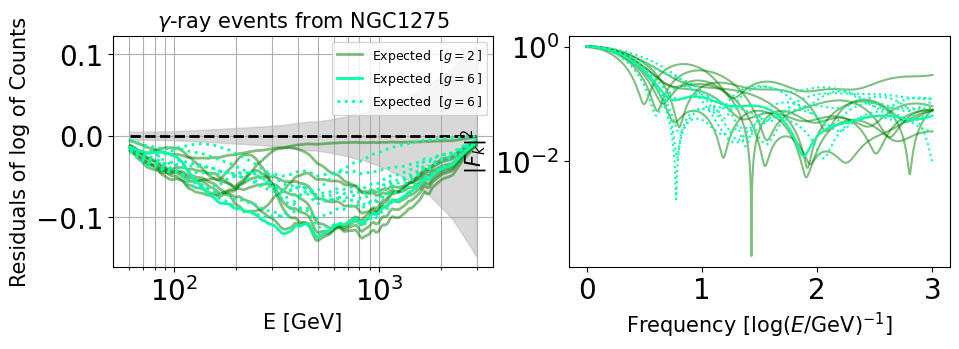

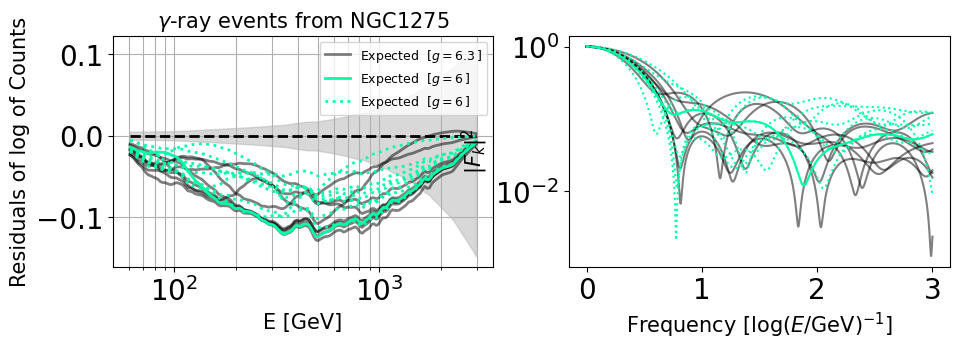

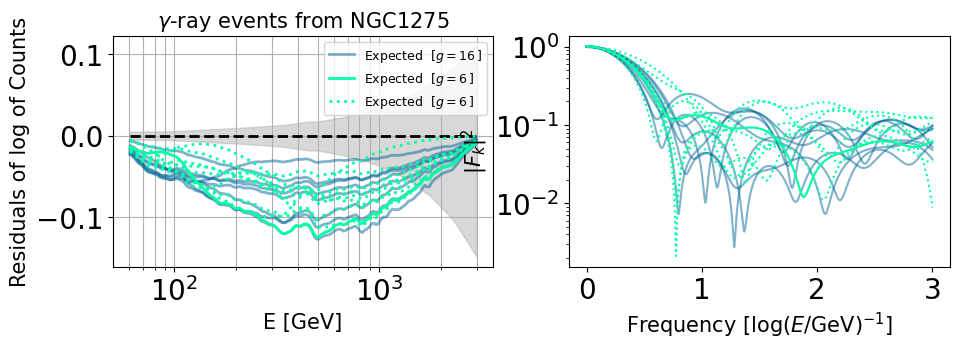

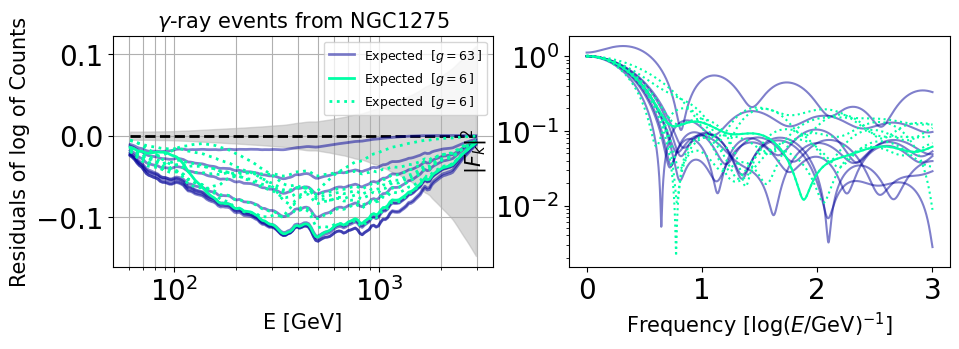

In [15]:
comparisons(1)

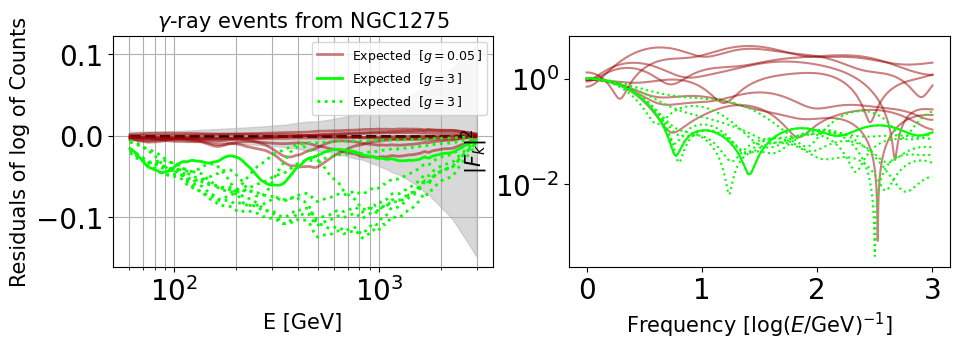

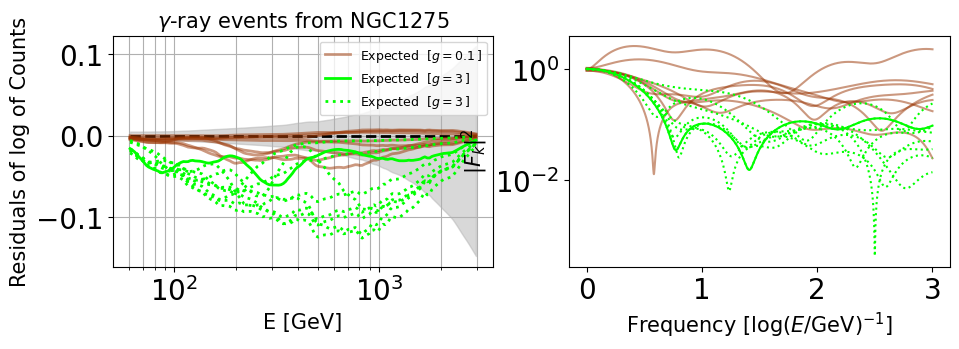

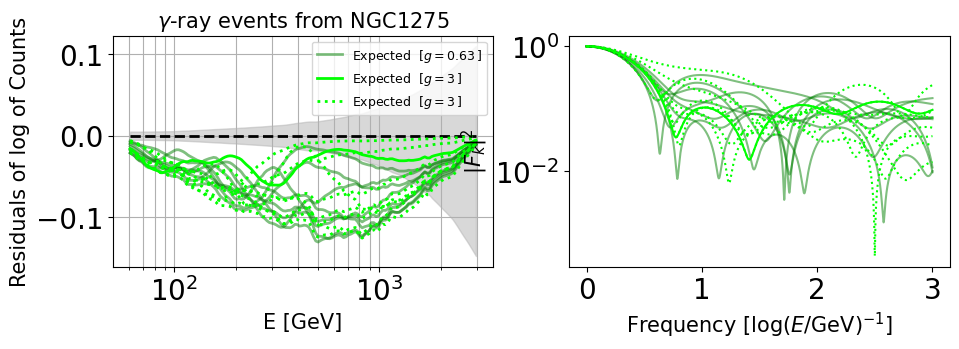

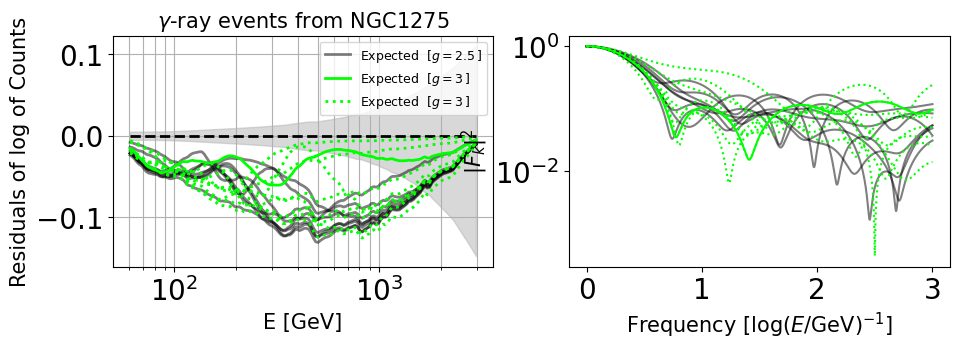

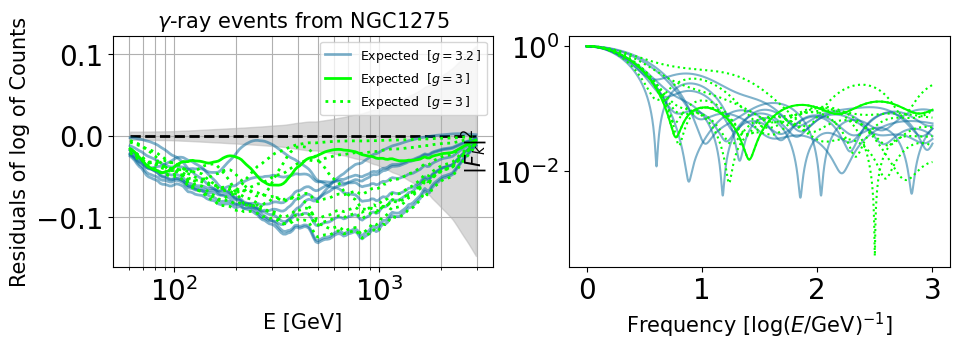

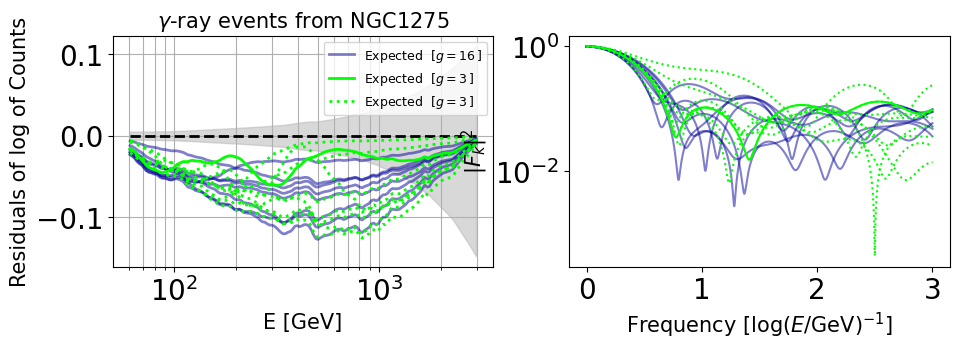

In [16]:
comparisons(2)

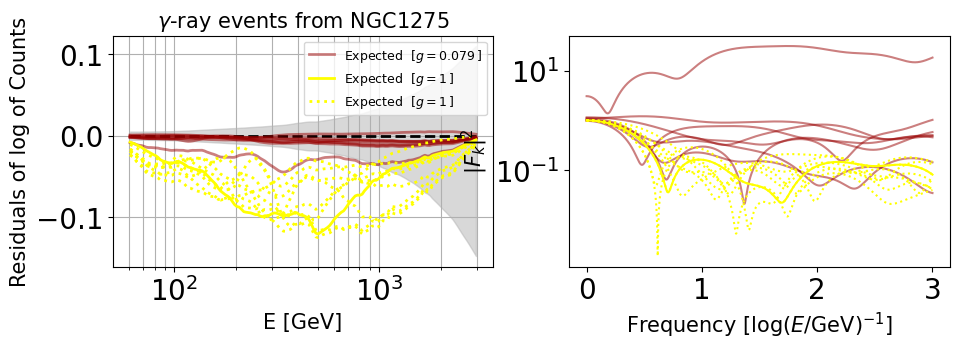

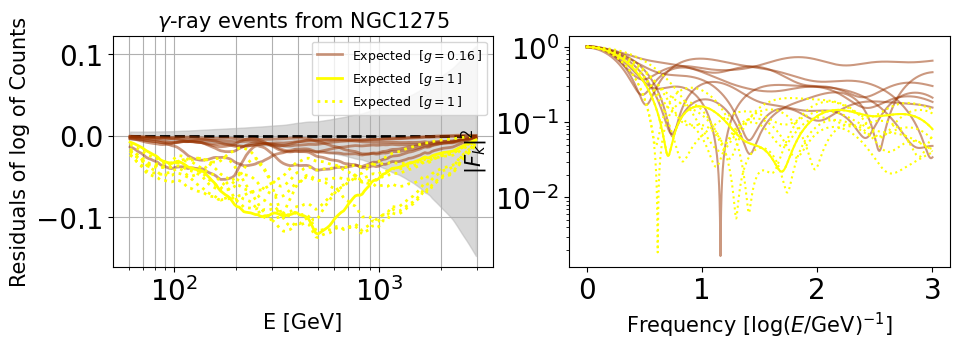

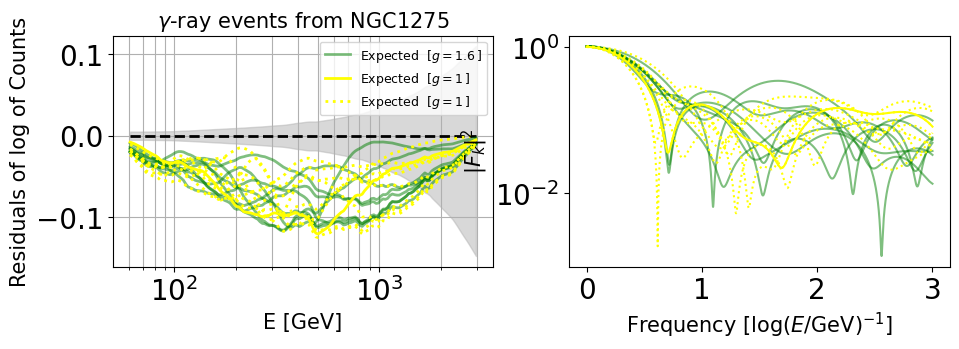

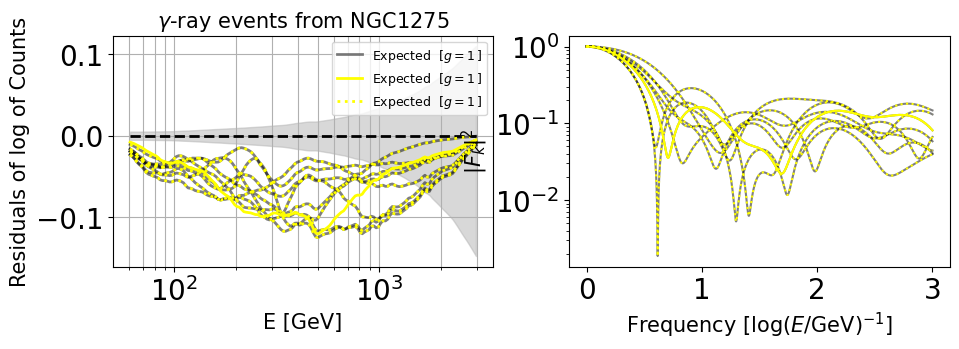

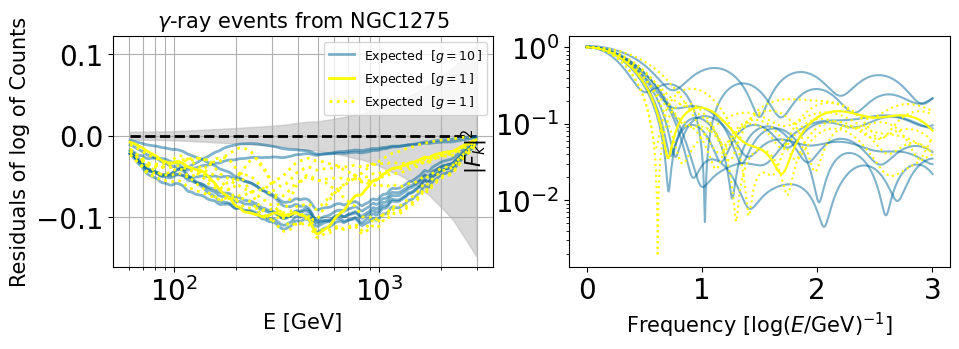

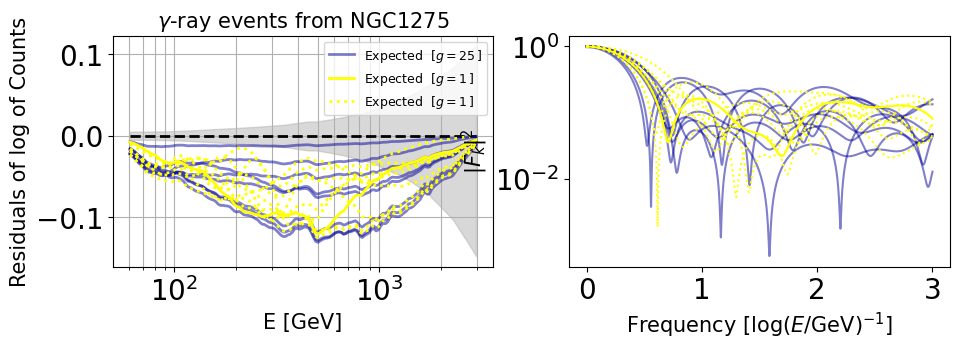

In [17]:
comparisons(3)

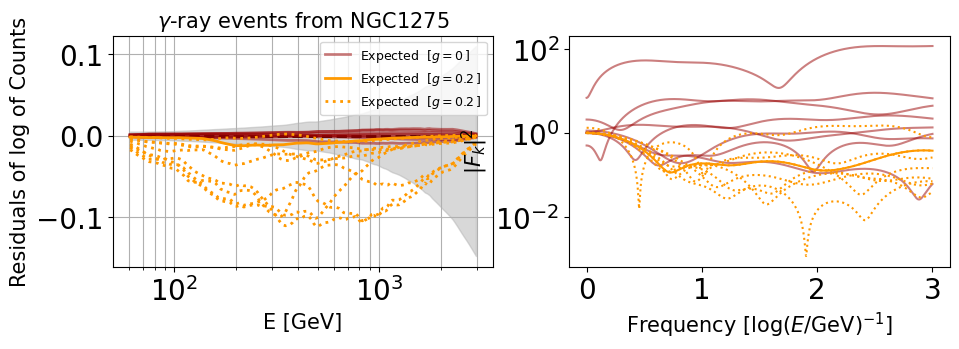

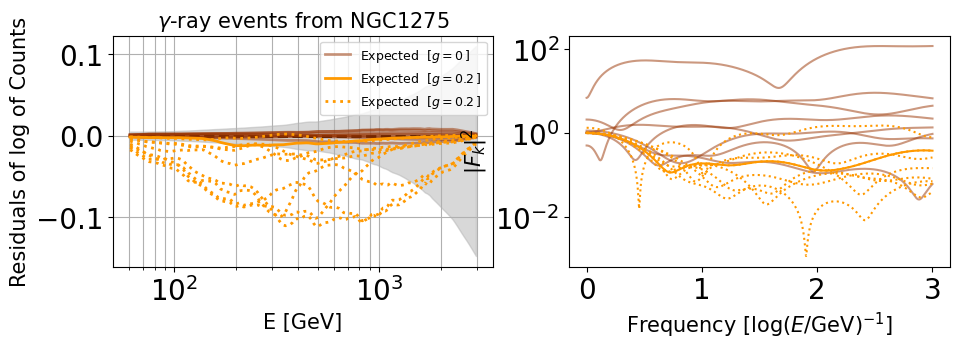

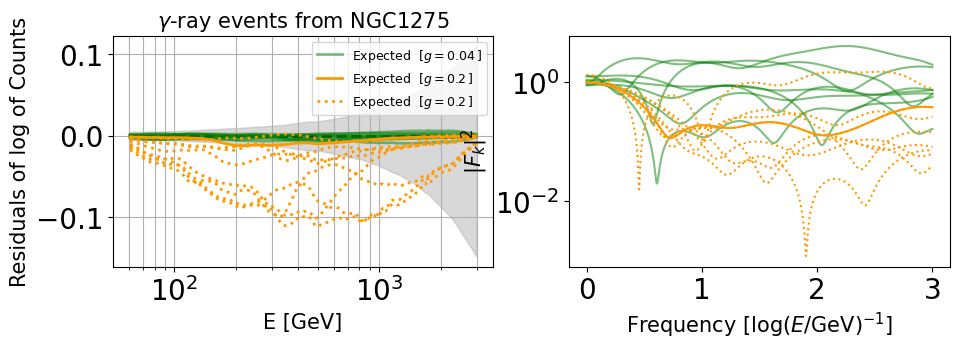

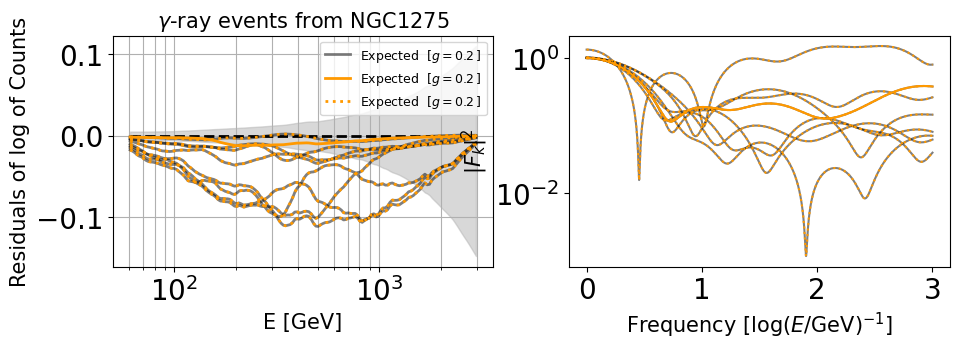

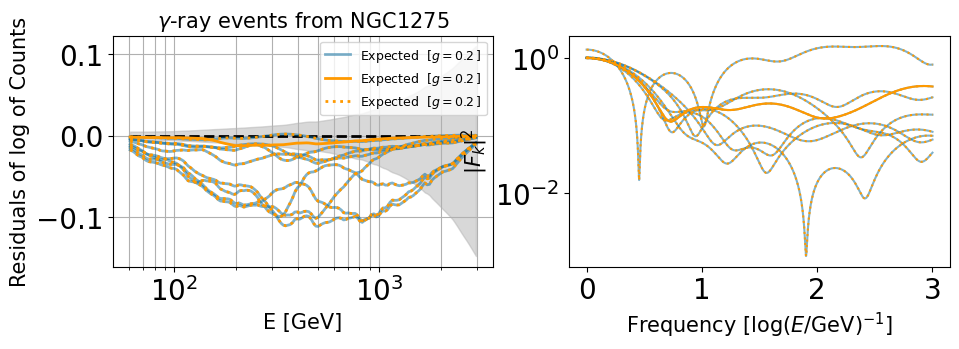

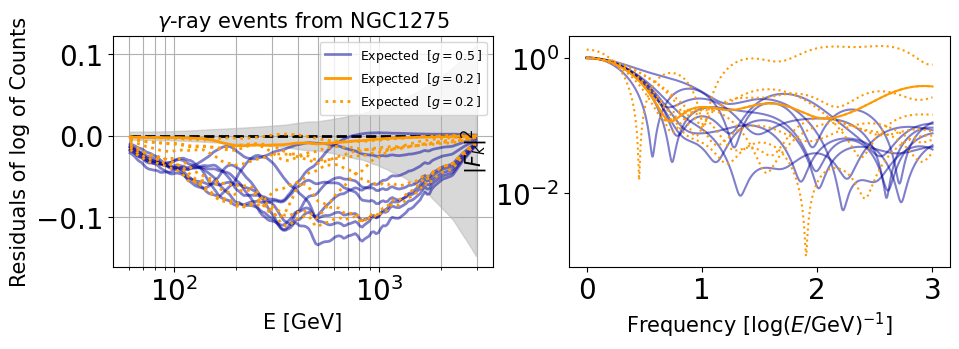

In [18]:
comparisons(4)

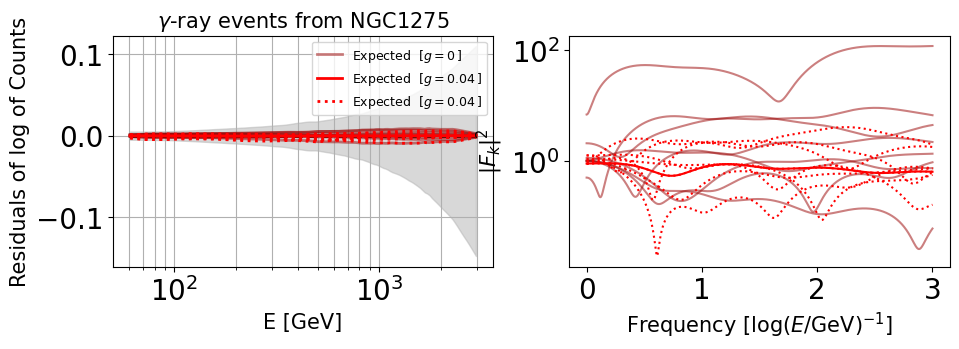

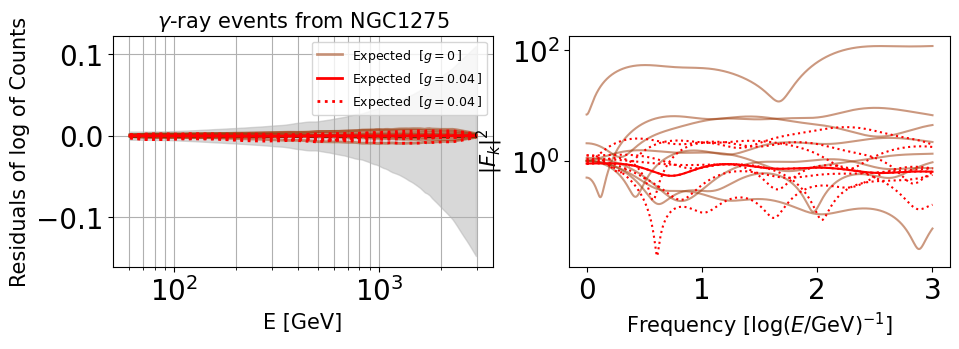

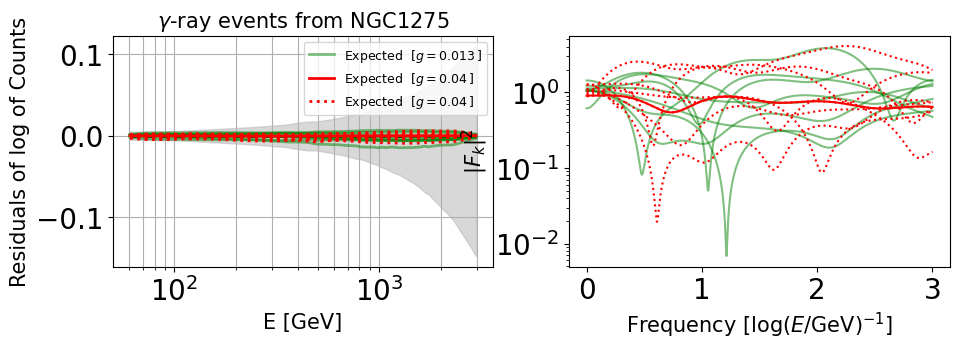

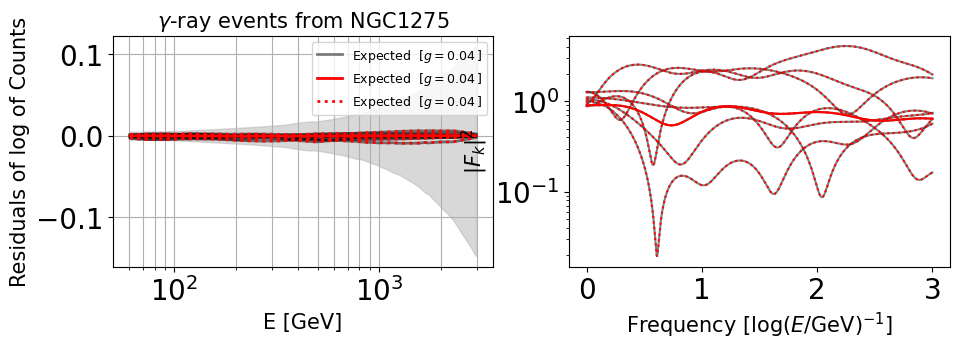

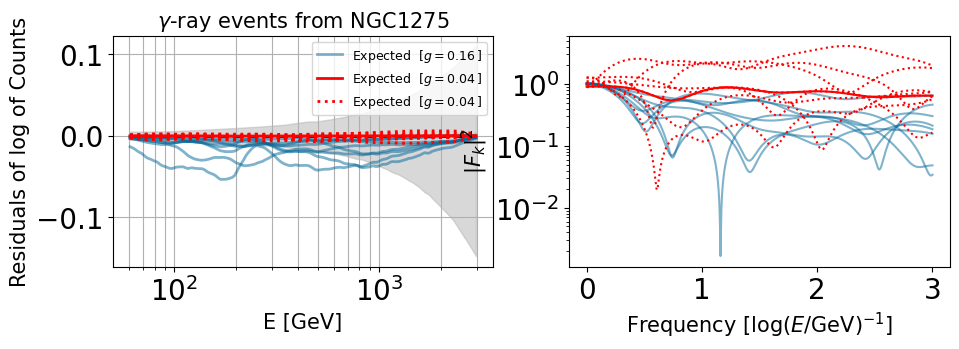

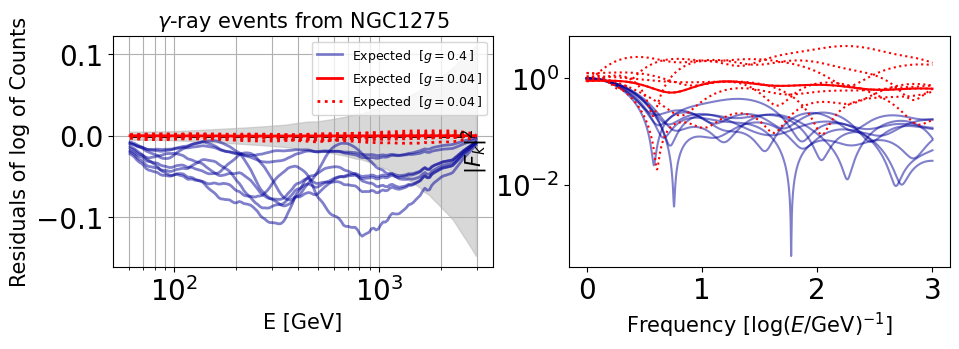

In [19]:
comparisons(5)

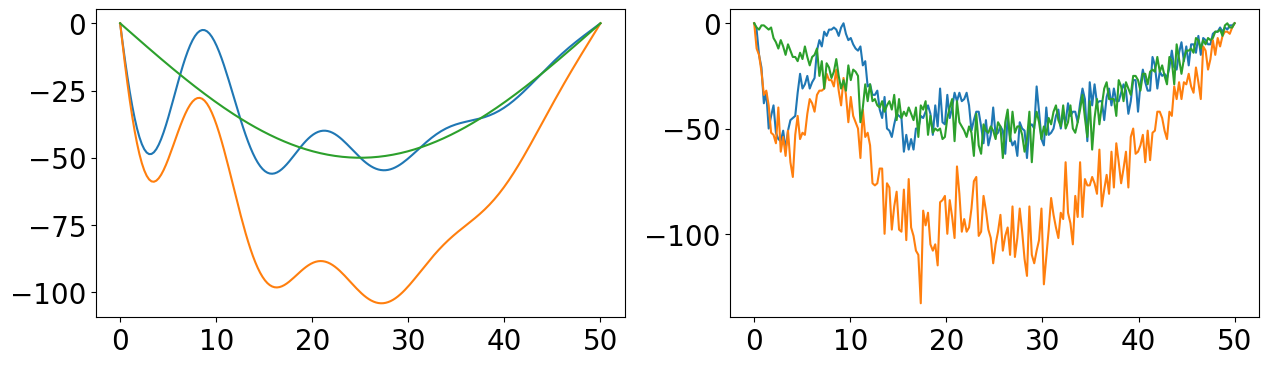

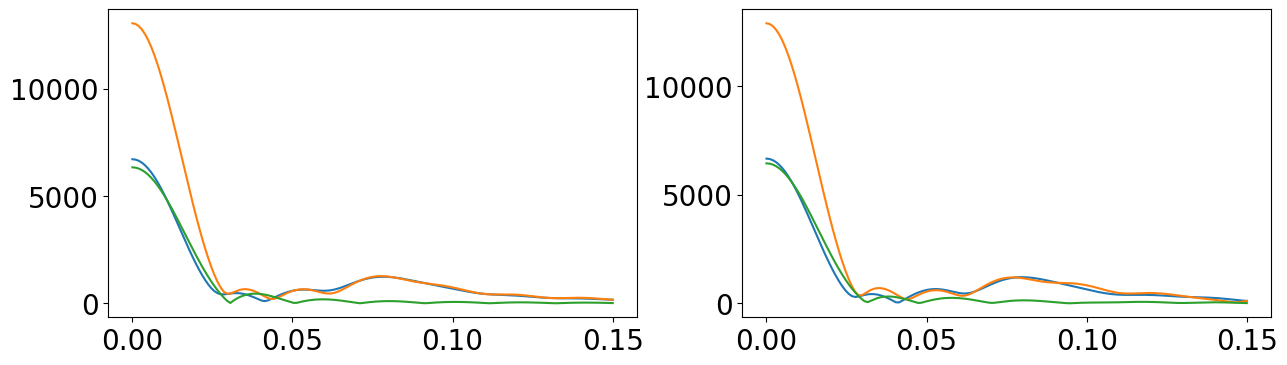

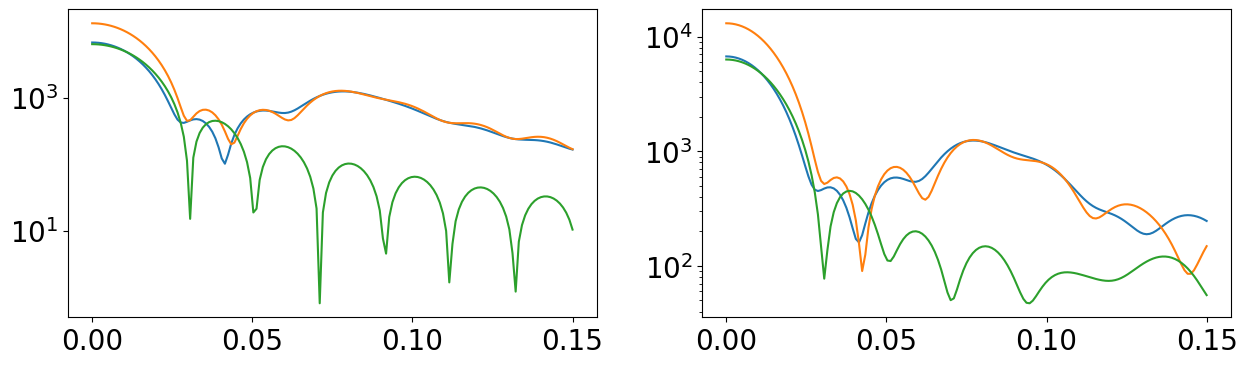

In [20]:
len_ft = 2**12
bt =0.15
norm = 100
logyt = 0

stuff = np.linspace(0,200,200)
xs = np.linspace(0,50,200)

stuff_sine = norm*(-0.5*np.exp(-stuff/50)*np.sin(2*np.pi*stuff/50) - 0.5*np.sin(2*np.pi*stuff/400)) + 0
#stuff_sine = norm*(-0.5*np.sin(2*np.pi*stuff/25) - 0.5*np.sin(2*np.pi*stuff/400)) + 0
stuff_high_amp = stuff_sine-norm*0.5*np.sin(2*np.pi*stuff/400)
stuff_high_wl = stuff_sine+norm*0.5*np.exp(-stuff/50)*np.sin(2*np.pi*stuff/50)

xft = np.linspace(0,bt,int(len_ft*bt))
xft = np.linspace(0,bt,int(bt*((max(xs)-min(xs))/len(xs))*len_ft))
lenxt = len(xft)


plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(xs,stuff_sine)
plt.plot(xs,stuff_high_amp)
plt.plot(xs,stuff_high_wl)
plt.subplot(122)
plt.plot(xs,-np.random.poisson(abs(stuff_sine)))
plt.plot(xs,-np.random.poisson(abs(stuff_high_amp)))
plt.plot(xs,-np.random.poisson(abs(stuff_high_wl)))

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(xft,abs(np.fft.fft(stuff_sine,n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(stuff_high_amp,n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(stuff_high_wl,n=len_ft))[:lenxt])
if logyt: plt.yscale('log')
plt.subplot(122)
plt.plot(xft,abs(np.fft.fft(-np.random.poisson(abs(stuff_sine)),n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(-np.random.poisson(abs(stuff_high_amp)),n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(-np.random.poisson(abs(stuff_high_wl)),n=len_ft))[:lenxt])
if logyt: plt.yscale('log')
# plt.xscale('log')

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(xft,abs(np.fft.fft(stuff_sine,n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(stuff_high_amp,n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(stuff_high_wl,n=len_ft))[:lenxt])
plt.yscale('log')
plt.subplot(122)
plt.plot(xft,abs(np.fft.fft(-np.random.poisson(abs(stuff_sine)),n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(-np.random.poisson(abs(stuff_high_amp)),n=len_ft))[:lenxt])
plt.plot(xft,abs(np.fft.fft(-np.random.poisson(abs(stuff_high_wl)),n=len_ft))[:lenxt])
plt.yscale('log')
# plt.xscale('log')